# **IMDB MOVIE**

### Here's the analyze and visualization from a data set of 1,000 most popular movies on IMDB in the last 10 years (2006-2016). You can always download the dataset [here](https://www.kaggle.com/PromptCloudHQ/imdb-data).

**Define the columns:**

|Column| Definition|
|------|-----------|
|Rank| Movie Rank Order|
|Title| Film title|
|Genre| List of genres used to classify the film (comma-separated)|
|Description| Brief one-sentence movie summary|
|Director| Film's director's name|
|Actors| Main stars of the film (comma-separated)|
|Year| Year of film released|
|Runtime (Minutes)| Duration of film in minutes|
|Rating| User rating (0-10)|
|Votes| Number of votes|
|Revenue (Millions)| Movie revenue in millions|
|Metascore| Aggregated average of critic scores (0-100)|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv('IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


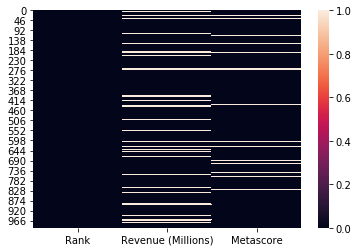

In [4]:
sns.heatmap(movies.iloc[:,[0,-2,-1]].isnull())

### **RENAME COLUMN NAMES**

In [5]:
movies.columns

Index([u'Rank', u'Title', u'Genre', u'Description', u'Director', u'Actors',
       u'Year', u'Runtime (Minutes)', u'Rating', u'Votes',
       u'Revenue (Millions)', u'Metascore'],
      dtype='object')

In [6]:
movies.columns = movies.columns.str.lower().str.replace(')','').str.replace('(','').str.replace(' ','_')
movies.head(3)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


### **TOP 10 MOVIES OF ALL TIME**

Text(0,0.5,"Movie's title")

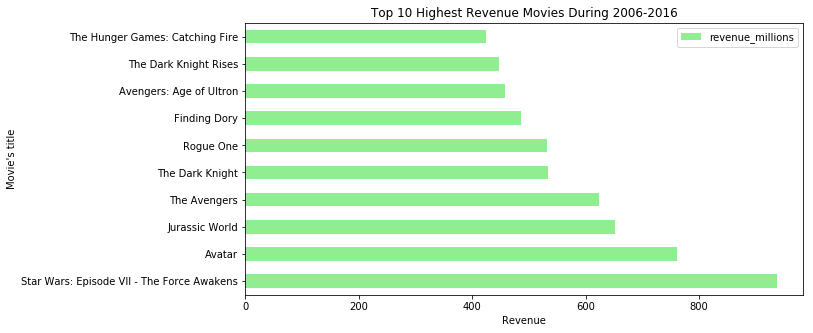

In [7]:
# By Revenue
movies.sort_values(by='revenue_millions',
                   ascending=False)[:10].plot.barh(x='title',
                                                   y='revenue_millions',
                                                   color='lightgreen',
                                                   figsize=(10,5))
plt.title('Top 10 Highest Revenue Movies During 2006-2016')
plt.xlabel('Revenue')
plt.ylabel('Movie\'s title')

Text(0,0.5,"Movie's title")

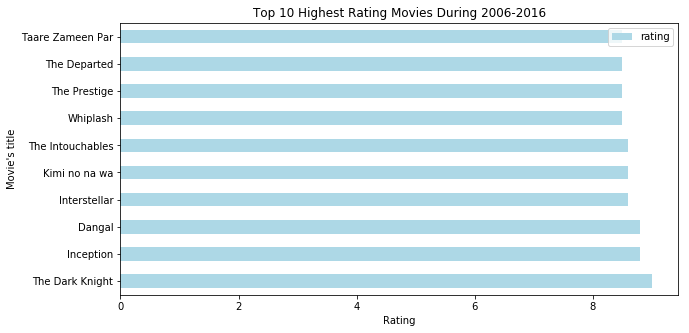

In [8]:
# By Rating
movies.sort_values(by='rating',
                   ascending=False)[:10].plot.barh(x='title',
                                                   y='rating',
                                                   color='lightblue',
                                                   figsize=(10,5))
plt.title('Top 10 Highest Rating Movies During 2006-2016')
plt.xlabel('Rating')
plt.ylabel('Movie\'s title')

### **FIND THE MOST POPULAR GENRE**

In [9]:
movies['genre_split'] = movies['genre'].str.split(',')
movies['genre_split'][:10]

0       [Action, Adventure, Sci-Fi]
1      [Adventure, Mystery, Sci-Fi]
2                [Horror, Thriller]
3       [Animation, Comedy, Family]
4      [Action, Adventure, Fantasy]
5      [Action, Adventure, Fantasy]
6            [Comedy, Drama, Music]
7                          [Comedy]
8    [Action, Adventure, Biography]
9       [Adventure, Drama, Romance]
Name: genre_split, dtype: object

In [10]:
movies['genre_count'] = movies['genre_split'].apply(len)
movies[['genre_split','genre_count']][:10]

,genre_split,genre_count
0,"[Action, Adventure, Sci-Fi]",3
1,"[Adventure, Mystery, Sci-Fi]",3
2,"[Horror, Thriller]",2
3,"[Animation, Comedy, Family]",3
4,"[Action, Adventure, Fantasy]",3
5,"[Action, Adventure, Fantasy]",3
6,"[Comedy, Drama, Music]",3
7,[Comedy],1
8,"[Action, Adventure, Biography]",3
9,"[Adventure, Drama, Romance]",3


In [11]:
movies['genre_count'].value_counts()

3    660
2    235
1    105
Name: genre_count, dtype: int64

In [12]:
genre_dict = {}

for row in movies['genre_split']:
    for genre in row:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
genre_dict

{'Action': 303,
 'Adventure': 259,
 'Animation': 49,
 'Biography': 81,
 'Comedy': 279,
 'Crime': 150,
 'Drama': 513,
 'Family': 51,
 'Fantasy': 101,
 'History': 29,
 'Horror': 119,
 'Music': 16,
 'Musical': 5,
 'Mystery': 106,
 'Romance': 141,
 'Sci-Fi': 120,
 'Sport': 18,
 'Thriller': 195,
 'War': 13,
 'Western': 7}

In [13]:
print('Genre of most films is: {}, with {} films.'.format(max(genre_dict, key=genre_dict.get),
                                                          genre_dict[max(genre_dict, key=genre_dict.get)]))

Genre of most films is: Drama, with 513 films.


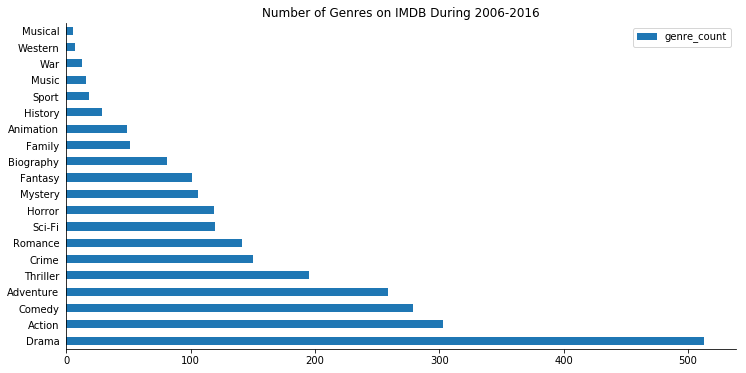

In [14]:
test = pd.Series(genre_dict)
test = pd.DataFrame(test, columns=['genre_count'])

fig,ax = plt.subplots(1,1,figsize=(12,6))
test.sort_values(by='genre_count', ascending=False).plot.barh(ax=ax)
ax.set_title('Number of Genres on IMDB During 2006-2016')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)

### **FIND THE MOST POPULAR ACTOR**

In [15]:
movies['actors_split'] = movies['actors'].str.split(',')
movies['actors_split'][:10]

0    [Chris Pratt,  Vin Diesel,  Bradley Cooper,  Z...
1    [Noomi Rapace,  Logan Marshall-Green,  Michael...
2    [James McAvoy,  Anya Taylor-Joy,  Haley Lu Ric...
3    [Matthew McConaughey, Reese Witherspoon,  Seth...
4    [Will Smith,  Jared Leto,  Margot Robbie,  Vio...
5    [Matt Damon,  Tian Jing,  Willem Dafoe,  Andy ...
6    [Ryan Gosling,  Emma Stone,  Rosemarie DeWitt,...
7    [Essie Davis,  Andrea Riseborough,  Julian Bar...
8    [Charlie Hunnam,  Robert Pattinson,  Sienna Mi...
9    [Jennifer Lawrence,  Chris Pratt,  Michael She...
Name: actors_split, dtype: object

In [16]:
# Find the most popular actors during 2006-2016
actor_dict = {}

for row in movies['actors_split']:
    for actor in row:
        if actor in actor_dict:
            actor_dict[actor] += 1
        else:
            actor_dict[actor] = 1
print('The most popular actor of all time: {} - Appeared in {} films'.format(max(actor_dict, key=actor_dict.get),
                                                                             actor_dict[max(actor_dict, key=actor_dict.get)]))
pd.Series(actor_dict).sort_values(ascending=False)[:10]

The most popular actor of all time: Christian Bale - Appeared in 11 films


Christian Bale         11
Mark Wahlberg          11
Jake Gyllenhaal         9
Denzel Washington       9
 Rose Byrne             9
Leonardo DiCaprio       9
 Woody Harrelson        9
Will Smith              9
Matthew McConaughey     9
Brad Pitt               9
dtype: int64

In [17]:
# Christian Bale's Films:
import re
movies[movies['actors'].str.contains(r'Christian Bale', flags=re.I)][['title','actors','year']].sort_values(by='year')

,title,actors,year
64,The Prestige,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006
796,Rescue Dawn,"Christian Bale, Steve Zahn, Jeremy Davies, Zac...",2006
54,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008
655,Public Enemies,"Christian Bale, Johnny Depp, Christian Stolte,...",2009
856,Terminator Salvation,"Christian Bale, Sam Worthington, Anton Yelchin...",2009
759,The Fighter,"Mark Wahlberg, Christian Bale, Amy Adams,Melis...",2010
124,The Dark Knight Rises,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012
347,American Hustle,"Christian Bale, Amy Adams, Bradley Cooper,Jenn...",2013
852,Out of the Furnace,"Christian Bale, Casey Affleck, Zoe Saldana, Wo...",2013
516,Exodus: Gods and Kings,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014


In [18]:
# Find the most popular actor by year
actor_year = {}
actor_film_year = {}
for year in movies['year'].unique():
    freq = {}
    for row in movies[movies['year']==year]['actors_split']:
        for actor in row:
            if actor in freq:
                freq[actor] += 1
            else:
                freq[actor] = 1
    actor_year[year] = max(freq, key=freq.get)
    actor_film_year[year] = freq[max(freq, key=freq.get)]
popular_actor = pd.DataFrame(pd.Series(actor_year), columns=['most_popular_actor'])
popular_actor['no. of films'] = pd.Series(actor_film_year)
popular_actor

,most_popular_actor,no. of films
2006,Hugh Jackman,3
2007,Michelle Monaghan,2
2008,Angelina Jolie,3
2009,Diane Kruger,2
2010,Jeff Bridges,2
2011,Jude Law,2
2012,Sam Worthington,2
2013,Jamie Bell,3
2014,Keira Knightley,2
2015,Kate Mara,3


### **FIND THE STRENGTH OF EACH DIRECTOR**

In [19]:
def strong_genre(director):
    genre_dict = {}
    
    for row in movies[movies['director']==director]['genre_split']:
        for genre in row:
            if genre in genre_dict:
                genre_dict[genre] += 1
            else:
                genre_dict[genre] = 1
    return max(genre_dict, key=genre_dict.get)
movies['strong_genre'] = movies['director'].apply(strong_genre)

In [20]:
movies[['director','strong_genre']][:10]

,director,strong_genre
0,James Gunn,Sci-Fi
1,Ridley Scott,Drama
2,M. Night Shyamalan,Thriller
3,Christophe Lourdelet,Comedy
4,David Ayer,Drama
5,Yimou Zhang,Action
6,Damien Chazelle,Drama
7,Sean Foley,Comedy
8,James Gray,Action
9,Morten Tyldum,Drama


### **FIND THE MOST POPULAR DIRECTOR AS WELL AS ACTOR BY GENRE**

In [21]:
# Define a function that can return the most popular (Actor/Director) by Genre.
def the_best(col1, col2):
    final_dict = {}
    
    unique_set = set(movies[col1].str.split(',').sum())
    for each in unique_set:
        dataset = movies[movies[col1].str.contains(each)]
        freq = {}
        for row in dataset[col2].str.split(','):
            for name in row:
                if name in freq:
                    freq[name] += 1
                else:
                    freq[name] = 1
        final_dict[each] = max(freq, key=freq.get)
    return final_dict

In [22]:
best_actors = pd.Series(the_best('genre','actors'))
best_all = pd.DataFrame(best_actors, columns=['best_actor'])
best_all['best_director'] = pd.Series(the_best('genre','director'))
best_all

,best_actor,best_director
Action,Robert Downey Jr.,Paul W.S. Anderson
Adventure,Robert Downey Jr.,David Yates
Animation,Jack Black,Pierre Coffin
Biography,Matthew McConaughey,Clint Eastwood
Comedy,Adam Sandler,Adam McKay
Crime,Tom Hardy,Justin Lin
Drama,Christian Bale,Ridley Scott
Family,Zachary Gordon,David Yates
Fantasy,Daniel Radcliffe,David Yates
History,Natalie Portman,Kathryn Bigelow


In [23]:
movies.head(3)

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore,genre_split,genre_count,actors_split,strong_genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]",3,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]",3,"[Noomi Rapace, Logan Marshall-Green, Michael...",Drama
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]",2,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...",Thriller


### **FIND AGGREGATED VALUES**

### 1. BY GENRE

In [24]:
# Find total_durations, total revenues, total votes, average ratings, average metascore by Genre
durations = {}
revenues = {}
votes = {}
ratings = {}
metascores = {}
for genre in set(movies['genre_split'].sum()):
    dataset = movies[movies['genre'].str.contains(genre)]
    
    durations[genre] = dataset['runtime_minutes'].mean()
    revenues[genre] = dataset['revenue_millions'].sum()
    votes[genre] = dataset['votes'].sum()
    ratings[genre] = dataset['rating'].mean()
    metascores[genre] = dataset['metascore'].mean()
    
summary = pd.DataFrame(pd.Series(durations), columns=['average_duration'])
summary['total_revenues'] = pd.Series(revenues)
summary['average_rating'] = pd.Series(ratings)
summary['average_metascore'] = pd.Series(metascores)
summary['total_votes'] = pd.Series(votes)
summary

,average_duration,total_revenues,average_rating,average_metascore,total_votes
Action,116.739274,35605.42,6.614521,53.830450,71435768
Adventure,117.698842,38852.61,6.772201,57.670683,66819104
Animation,98.142857,8987.50,7.324490,70.782609,10199812
Biography,122.580247,4185.12,7.290123,68.943662,12308853
Comedy,105.899642,19316.45,6.647670,57.604478,39524025
Crime,115.413333,8034.62,6.786667,57.787234,26340107
Drama,116.635478,21931.45,6.953801,63.497890,74784098
Family,110.980392,6182.61,6.684314,55.620000,7495269
Fantasy,117.504950,12262.06,6.548515,55.142857,21696703
History,130.689655,1376.02,7.127586,70.857143,4189695


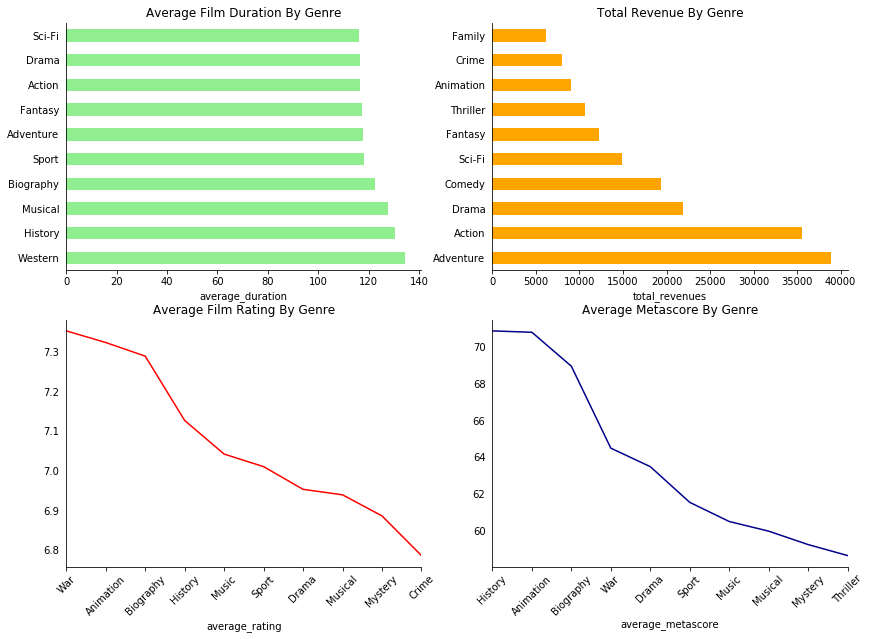

In [25]:
fig = plt.figure(figsize=(14,10))
colors = ['lightgreen','orange','red','darkblue']
titles = ['Average Film Duration By Genre',
          'Total Revenue By Genre',
          'Average Film Rating By Genre',
          'Average Metascore By Genre']

for i in range(2):
    ax = fig.add_subplot(2,2,i+1)
    data = summary.iloc[:,i].sort_values(ascending=False)[:10]
    data.plot.barh(color=colors[i])
    ax.set_title(titles[i])
    ax.set_xlabel(summary.columns[i])
    ax.tick_params(left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for i in range(2,4):
    ax = fig.add_subplot(2,2,i+1)
    data = summary.iloc[:,i].sort_values(ascending=False)[:10]
    data.plot(c=colors[i], rot=45)
    ax.set_xlabel(summary.columns[i])
    ax.set_title(titles[i])
    ax.tick_params(left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

### 2. BY YEAR

Text(0,0.5,'Number of movies')

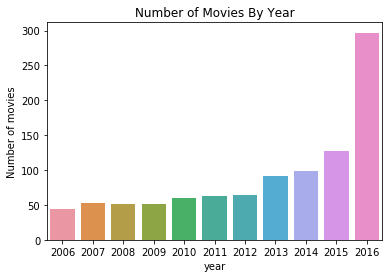

In [26]:
# Number of movies by Year
sns.countplot(data=movies, x='year')
plt.title('Number of Movies By Year')
plt.ylabel('Number of movies')

In [27]:
# Find best genre by Year
def year_best(col):
    best_of_year = {}
    
    for year in movies['year'].unique():
        freq = {}
        subset = movies[movies['year']==year][col].str.split(',')
        
        for row in subset:
            for each in row:
                if each in freq:
                    freq[each] += 1
                else:
                    freq[each] = 1
        best_of_year[year] = max(freq, key=freq.get)
    return best_of_year

pd.DataFrame(pd.Series(year_best('genre')), columns=['best_genre'])

,best_genre
2006,Drama
2007,Drama
2008,Action
2009,Drama
2010,Drama
2011,Drama
2012,Drama
2013,Drama
2014,Drama
2015,Drama


In [28]:
movie_sum = movies.pivot_table(index='year',
                               values=['revenue_millions','votes'],
                               aggfunc='sum')
movie_sum

,revenue_millions,votes
year,,
2006,3624.46,11848758
2007,4306.23,12949545
2008,5053.22,14326280
2009,5292.26,13044813
2010,5989.65,15166939
2011,5431.96,15169789
2012,6910.29,18254470
2013,7666.72,19933518
2014,7997.40,19985162


Text(0,0.5,'Revenue')

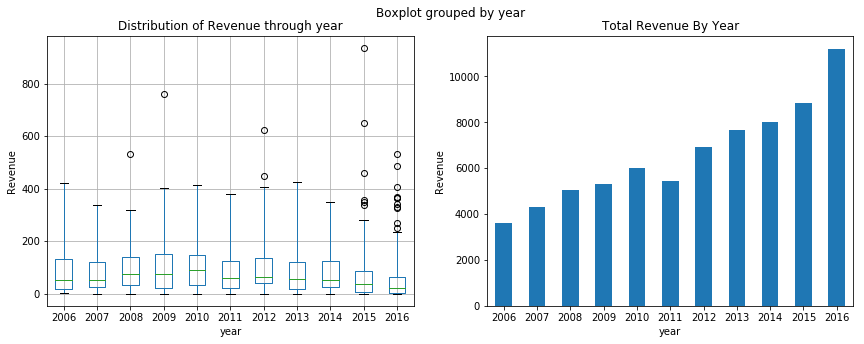

In [29]:
# Find the distribution of revenue
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
movies.boxplot('revenue_millions', by='year',
               whis=3, ax=ax1)
movie_sum['revenue_millions'].plot.bar(rot=0,
                                       title='Total Revenue By Year',
                                       ax=ax2)
ax1.set_title('Distribution of Revenue through year')
ax1.set_ylabel('Revenue')
ax2.set_ylabel('Revenue')
# ax.axhline(movies['revenue_millions'].describe()['50%'],
#            alpha=0.5,
#            c='red')

Text(0,0.5,'Number of Votes')

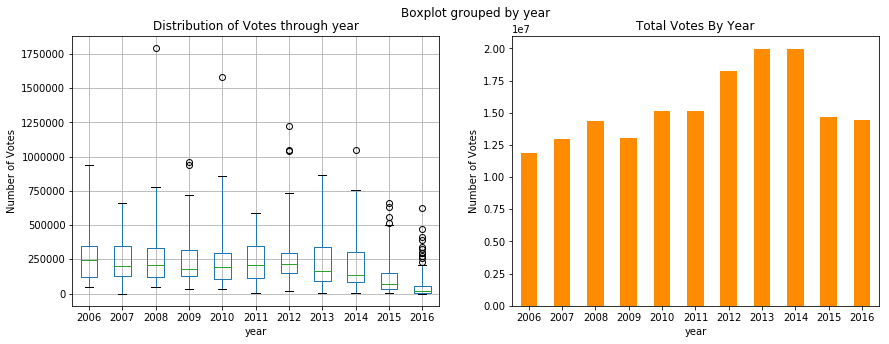

In [30]:
# Find the distribution of votes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
movies.boxplot('votes', by='year',
               whis=3, ax=ax1)
movie_sum['votes'].plot.bar(rot=0, color='darkorange',
                            title='Total Votes By Year',
                            ax=ax2)
ax1.set_title('Distribution of Votes through year')
ax1.set_ylabel('Number of Votes')
ax2.set_ylabel('Number of Votes')
# ax2.set_xticks(range(2006,2017))

In [31]:
movie_avg = movies.pivot_table(index='year',
                               values=['runtime_minutes','rating','metascore'],
                               aggfunc='mean')
movie_avg

,metascore,rating,runtime_minutes
year,,,
2006,64.414634,7.125000,120.840909
2007,64.500000,7.133962,121.622642
2008,57.408163,6.784615,110.826923
2009,57.122449,6.960784,116.117647
2010,59.389831,6.826667,111.133333
2011,61.724138,6.838095,114.603175
2012,61.145161,6.925000,119.109375
2013,58.534884,6.812088,116.065934
2014,57.315789,6.837755,114.489796


Text(0,0.5,'Runtime (Minutes)')

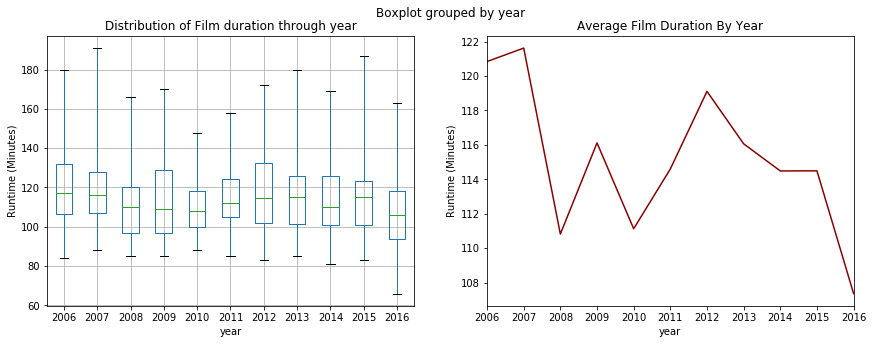

In [32]:
# Find the distribution of duration
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
movies.boxplot('runtime_minutes', by='year',
               whis=3, ax=ax1)
movie_avg['runtime_minutes'].plot(rot=0,
                                  title='Average Film Duration By Year',
                                  ax=ax2, c='darkred')
ax1.set_title('Distribution of Film duration through year')
ax2.set_xticks(range(2006,2017))
ax1.set_ylabel('Runtime (Minutes)')
ax2.set_ylabel('Runtime (Minutes)')

Text(0,0.5,'Rating')

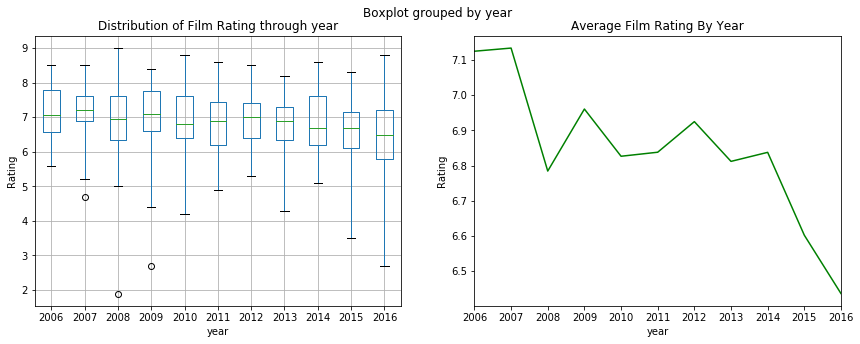

In [33]:
# Find the distribution of duration
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
movies.boxplot('rating', by='year',
               whis=3, ax=ax1)
movie_avg['rating'].plot(rot=0,
                         title='Average Film Rating By Year',
                         ax=ax2, c='green')
ax1.set_title('Distribution of Film Rating through year')
ax2.set_xticks(range(2006,2017))
ax1.set_ylabel('Rating')
ax2.set_ylabel('Rating')

Text(0,0.5,'Metascore')

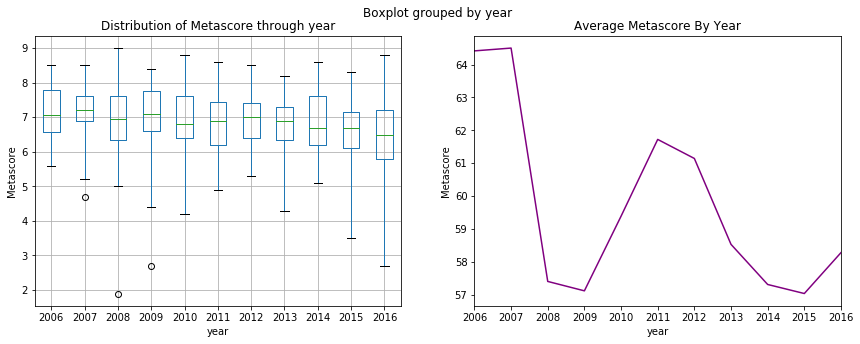

In [34]:
# Find the distribution of duration
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
movies.boxplot('rating', by='year',
               whis=3, ax=ax1)
movie_avg['metascore'].plot(rot=0,
                            title='Average Metascore By Year',
                            ax=ax2, c='purple')
ax1.set_title('Distribution of Metascore through year')
ax2.set_xticks(range(2006,2017))
ax1.set_ylabel('Metascore')
ax2.set_ylabel('Metascore')

### 3. BY DIRECTOR

In [35]:
# Find the ideal actor for each director
def ideal_actor(director):
    freq = {}
    
    for row in movies[movies['director']==director]['actors_split']:
        for actor in row:
            if actor in freq:
                freq[actor] += 1
            else:
                freq[actor] = 1
    
    return max(freq, key=freq.get)

movies['ideal_actor'] = movies['director'].apply(ideal_actor)
movies[['director','ideal_actor']][:10]

,director,ideal_actor
0,James Gunn,Don Thompson
1,Ridley Scott,Russell Crowe
2,M. Night Shyamalan,James McAvoy
3,Christophe Lourdelet,Matthew McConaughey
4,David Ayer,Michael Peña
5,Yimou Zhang,Tian Jing
6,Damien Chazelle,J.K. Simmons
7,Sean Foley,Julian Barratt
8,James Gray,Robert Pattinson
9,Morten Tyldum,Allen Leech


In [36]:
movies.pivot_table(index=['director','strong_genre','ideal_actor'],
                   values='revenue_millions',
                   aggfunc='sum').sort_values(by='revenue_millions', ascending=False)[:10]

,,,revenue_millions
director,strong_genre,ideal_actor,
J.J. Abrams,Adventure,Chris Pine,1683.45
David Yates,Adventure,Rupert Grint,1630.51
Christopher Nolan,Sci-Fi,Christian Bale,1515.09
Michael Bay,Action,Tyrese Gibson,1421.32
Francis Lawrence,Sci-Fi,Josh Hutcherson,1299.81
Joss Whedon,Action,Robert Downey Jr.,1082.27
Jon Favreau,Adventure,Gwyneth Paltrow,1025.60
Zack Snyder,Action,Amy Adams,975.74
Peter Jackson,Fantasy,Richard Armitage,860.45


Text(0,0.5,'Revenue/Movie (Millions)')

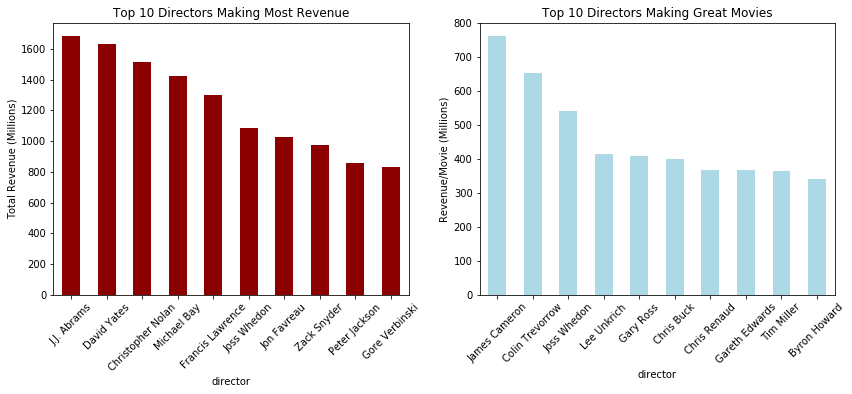

In [37]:
sum_revenue = movies.groupby('director')['revenue_millions'].agg('sum').sort_values(ascending=False)
avg_revenue = movies.groupby('director')['revenue_millions'].agg('mean').sort_values(ascending=False)

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
sum_revenue[:10].plot.bar(rot=45, color='darkred', ax=ax1)
avg_revenue[:10].plot.bar(rot=45, color='lightblue', ax=ax2)

ax1.set_title('Top 10 Directors Making Most Revenue')
ax2.set_title('Top 10 Directors Making Great Movies')
ax1.set_ylabel('Total Revenue (Millions)')
ax2.set_ylabel('Revenue/Movie (Millions)')

### **FIND THE CORRELATAION BETWEEN DURATION, VOTES, METASCORE AND REVENUE**

In [38]:
movies.corr()

,rank,year,runtime_minutes,rating,votes,revenue_millions,metascore,genre_count
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869,-0.073927
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305,-0.119828
runtime_minutes,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978,0.190211
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897,0.133102
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684,0.189703
revenue_millions,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397,0.182900
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000,0.009628
genre_count,-0.073927,-0.119828,0.190211,0.133102,0.189703,0.182900,0.009628,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FF3F588>,
      dtype=object)

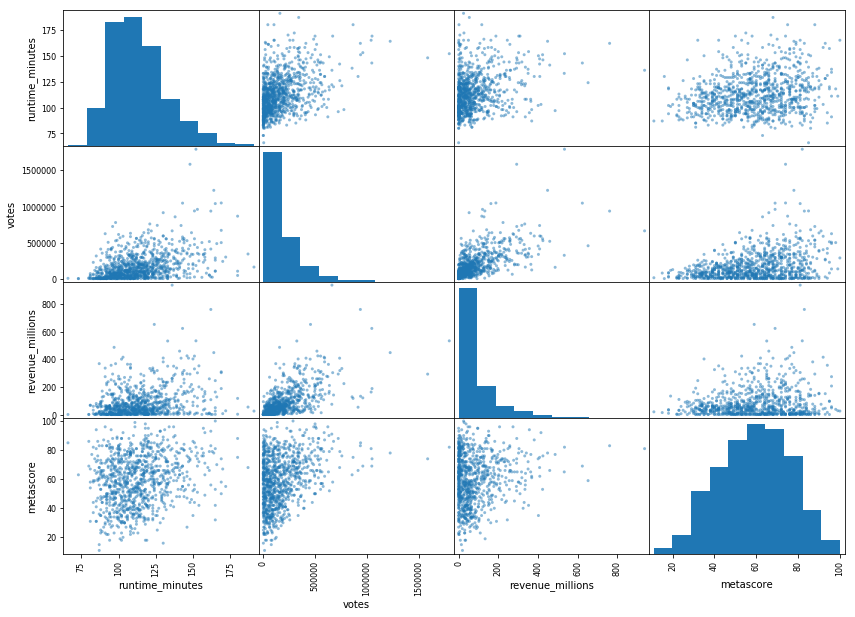

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(movies[['runtime_minutes','votes','revenue_millions','metascore']],
               figsize=(14,10))